In [21]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import bokeh.plotting as bpl
import cv2
import glob
import logging
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
import numpy as np
import os

try:
    cv2.setNumThreads(0)
except():
    pass

try:
    if __IPYTHON__:
        # this is used for debugging purposes only. allows to reload classes
        # when changed
        get_ipython().magic('load_ext autoreload')
        get_ipython().magic('autoreload 2')
except NameError:
    pass

import caiman as cm
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf import cnmf as cnmf
from caiman.source_extraction.cnmf import params as params
from caiman.utils.utils import download_demo
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
bpl.output_notebook()

import matplotlib as mpl
mpl.rcParams.update({
    'figure.figsize': (18, 13),
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

In [23]:
#%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
if 'dview' in locals():
    cm.stop_server(dview=dview)
c, dview, n_processes = cm.cluster.setup_cluster(
    backend='local', n_processes=None, single_thread=False)

# Compare caiman vs manual seg

In [37]:
# filename = '//duhs-user-nc1.dhe.duke.edu/dusom_glickfeldlab/All_Staff/home/lan/Data/2P_images/i1329/201209/002/caiman_002_vertical.hdf5'
# filename = '//duhs-user-nc1.dhe.duke.edu/dusom_glickfeldlab/All_Staff/home/lan/Data/2P_images/i1329/201209/002/caiman_002_1200_eval.hdf5'
filename = 'caiman_002_full.hdf5'
cnm = cnmf.load_CNMF(filename, n_processes=n_processes, dview=dview)

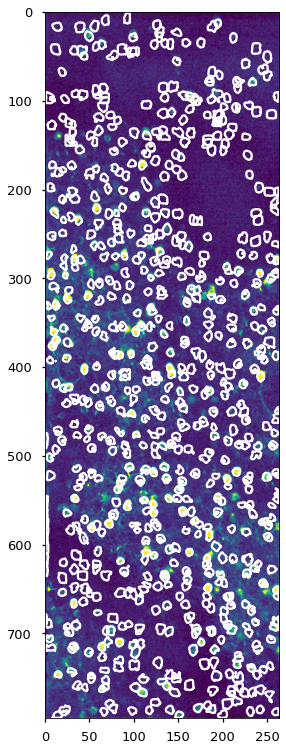

In [54]:
for cell_id in cnm.estimates.idx_components:
    _ = plot_contours(cnm.estimates.A[:, cell_id], Cn, thr=0.9, display_numbers=False);

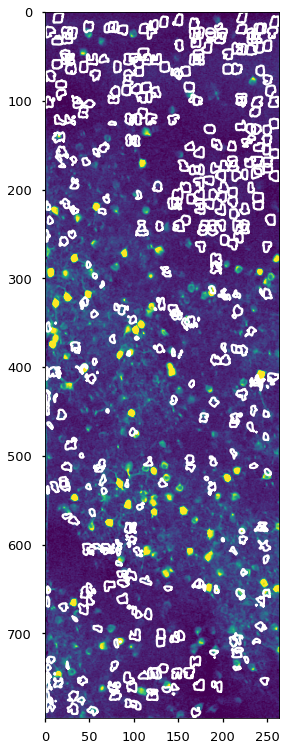

In [53]:
for cell_id in cnm.estimates.idx_components_bad:
    _ = plot_contours(cnm.estimates.A[:, cell_id], Cn, thr=0.9, display_numbers=False);

In [83]:
from custom_functions import loadmat
mat = 'Z:/All_Staff/home/lan/Analysis/2P/201209_i1329/201209_i1329_runs-002/201209_i1329_runs-002_mask_cell_addfake.mat'
t = loadmat(mat)
t['mask_cell'].shape, np.max(t['mask_cell'])

((264, 796), 70)

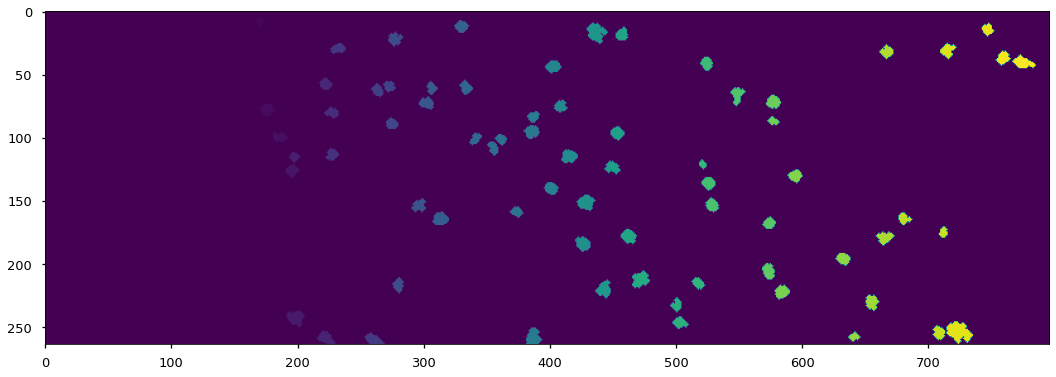

In [84]:
plt.imshow(t['mask_cell'])
# np.unique(t['mask_cell'])

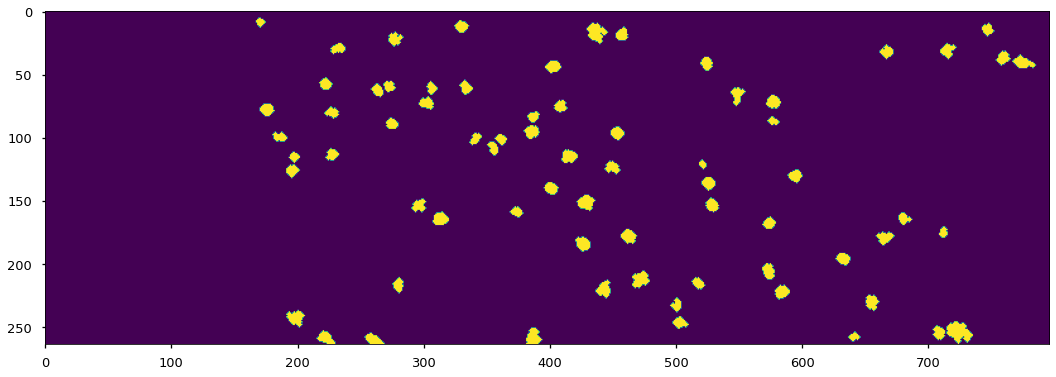

In [85]:
seg_ref = t['mask_cell'].copy()
sz = seg_ref.shape

seg_ref = seg_ref.flatten()
seg_ref[seg_ref>1] = 1
seg_ref = seg_ref.reshape(sz)

plt.imshow(seg_ref)

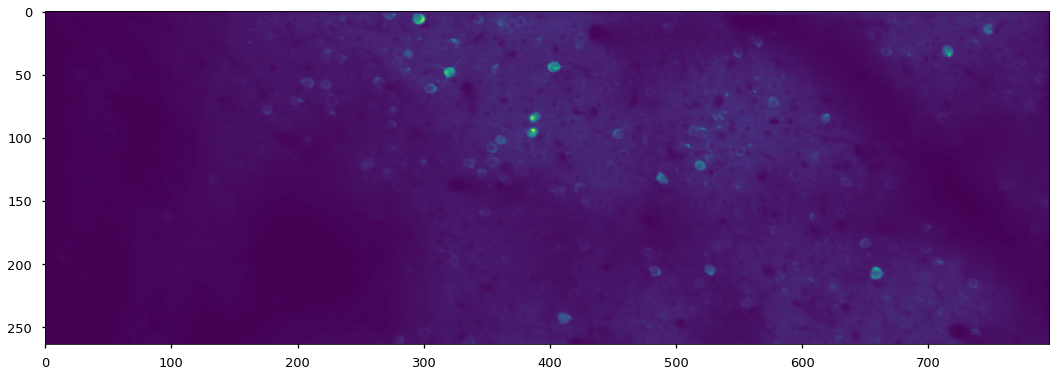

In [93]:
mat = 'Z:/All_Staff/home/lan/Analysis/2P/201209_i1329/201209_i1329_runs-002/data_max.mat'
t = loadmat(mat)

data_max_projection = t['data_max_projection']
data_top_perc = t['data_top_perc']

# plt.imshow(data_max_projection)
plt.imshow(data_top_perc)

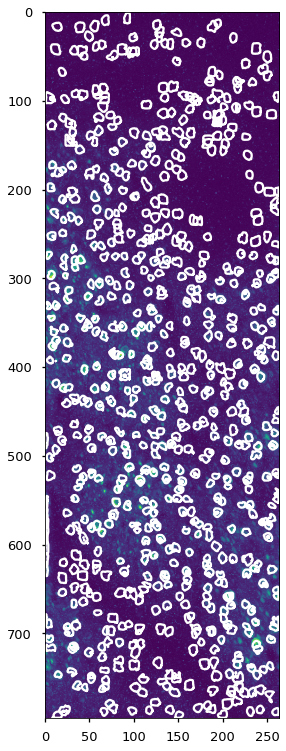

In [97]:
for cell_id in cnm.estimates.idx_components:
    _ = plot_contours(cnm.estimates.A[:, cell_id], Cn, thr=0.9, display_numbers=False);
# plt.imshow(seg_ref.T);
plt.imshow(data_max_projection.T)
plt.savefig('caiman_cell_background_max_proj.pdf', format='pdf', bbox_inches='tight')

In [103]:
%pdef plot_contours

 plot_contours(
    A,
    Cn,
    thr=None,
    thr_method='max',
    maxthr=0.2,
    nrgthr=0.9,
    display_numbers=True,
    max_number=None,
    cmap=None,
    swap_dim=False,
    colors='w',
    vmin=None,
    vmax=None,
    coordinates=None,
    contour_args={},
    number_args={},
    **kwargs,
)
 

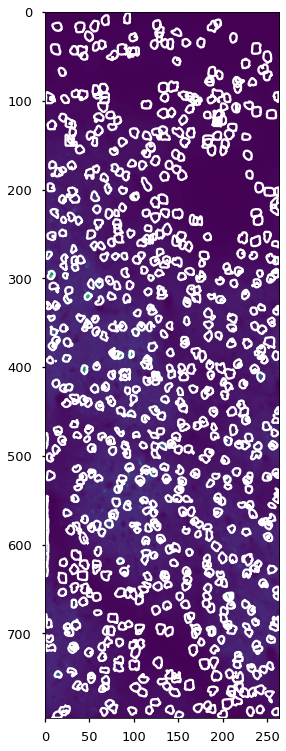

In [98]:
for cell_id in cnm.estimates.idx_components:
    _ = plot_contours(cnm.estimates.A[:, cell_id], Cn, thr=0.9, display_numbers=False);
# plt.imshow(seg_ref.T);
plt.imshow(data_top_perc.T)
plt.savefig('caiman_cell_background_top_perc.pdf', format='pdf', bbox_inches='tight')

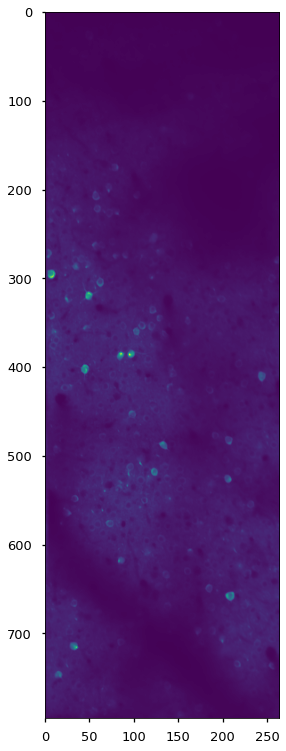

In [99]:
plt.imshow(data_top_perc.T)
plt.savefig('background_top_perc.pdf', format='pdf', bbox_inches='tight')

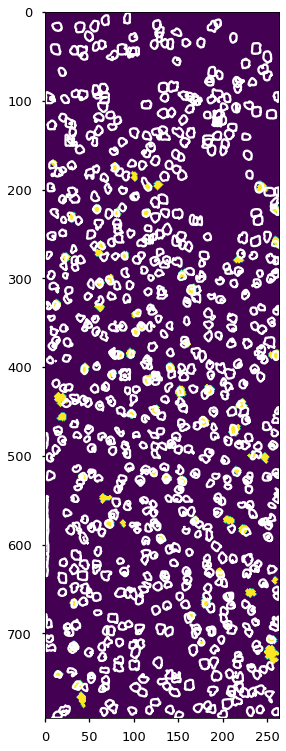

In [86]:
for cell_id in cnm.estimates.idx_components:
    _ = plot_contours(cnm.estimates.A[:, cell_id], Cn, thr=0.9, display_numbers=False);
plt.imshow(seg_ref.T);
plt.savefig('compare_caiman_vs_manual_strict.pdf', format='pdf', bbox_inches='tight')

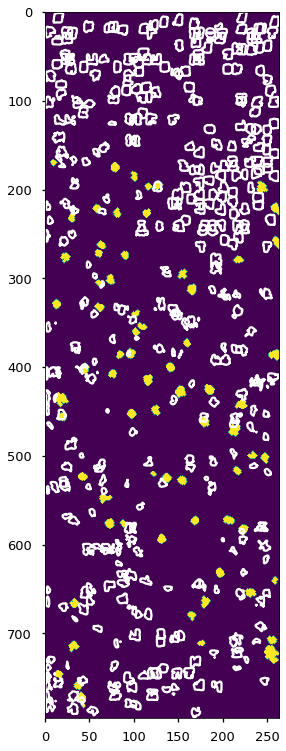

In [87]:
for cell_id in cnm.estimates.idx_components_bad:
    _ = plot_contours(cnm.estimates.A[:, cell_id], Cn, thr=0.9, display_numbers=False);
plt.imshow(seg_ref.T);
plt.savefig('compare_caiman_bad_vs_manual_strict.pdf', format='pdf', bbox_inches='tight')

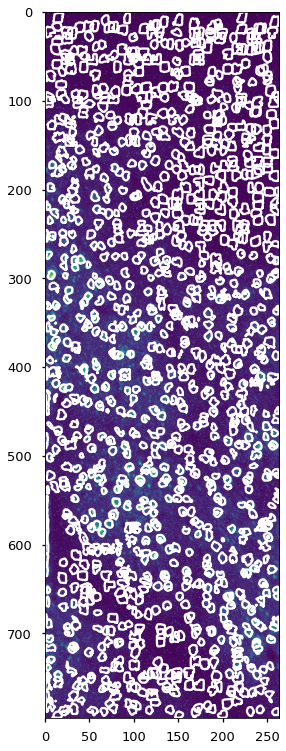

In [95]:
_ = plot_contours(cnm.estimates.A[:, :], Cn, thr=0.9, display_numbers=False);
# plt.imshow(seg_ref.T);
# plt.savefig('compare_caiman_all_vs_manual_strict.pdf', format='pdf', bbox_inches='tight')

plt.imshow(data_max_projection.T)
# plt.imshow(data_top_perc)

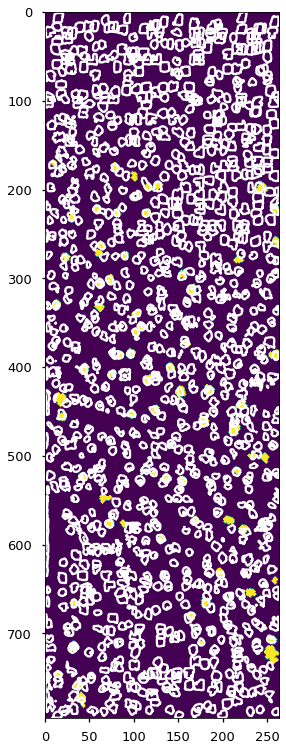

In [88]:
_ = plot_contours(cnm.estimates.A[:, :], Cn, thr=0.9, display_numbers=False);
plt.imshow(seg_ref.T);
plt.savefig('compare_caiman_all_vs_manual_strict.pdf', format='pdf', bbox_inches='tight')

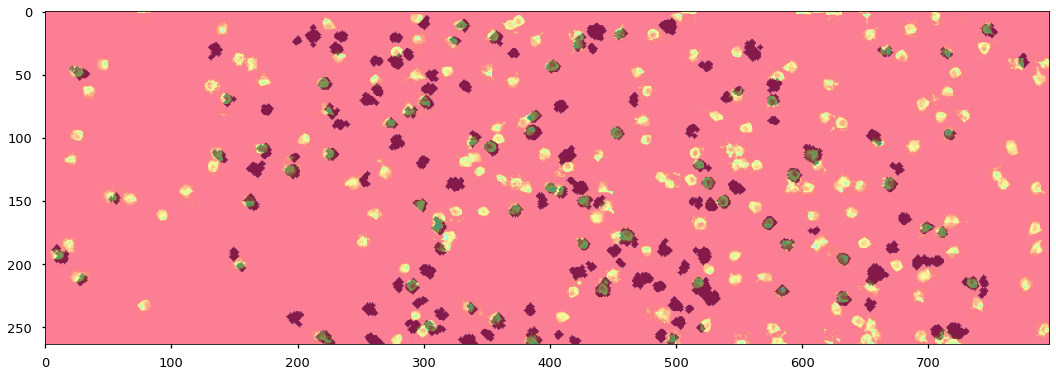

In [40]:
# # check how to get all cell map: cell spatial info is in a sparse matrix. non-cell area = 0
# from bokeh.plotting import figure, show

# es = cnm.estimates
# t = es.A[:,130].toarray().reshape([796,264], order='F')
# plt.imshow(t[50:100, 230:])
# # plt.imshow(t)

# ## add up every cell loc matrix to get overlaid all-cell map

# cell_map = np.zeros([796,264])
# for i in np.arange(es.A.shape[1]):
#     t = es.A[:,i].toarray().reshape([796,264], order='F')
#     cell_map = cell_map + t
    
# fig = plt.figure(figsize=[16,7])
# fig = plt.imshow(cell_map)

# seg_caiman = cell_map.T
# im1 = plt.imshow(seg_caiman, cmap='rainbow_alpha', alpha=0.99)
# im2 = plt.imshow(seg_ref, cmap='Blues', alpha=0.5)
# plt.show()

# Component eval

In [6]:
mmap_name = '//duhs-user-nc1.dhe.duke.edu/dusom_glickfeldlab/All_Staff/home/lan/Data/2P_images/i1329/201209/002/002_vertical_els__d1_796_d2_264_d3_1_order_F_frames_1200_.mmap'
Yr, dims, T = cm.load_memmap(mmap_name)
images = np.reshape(Yr.T, [T] + list(dims), order='F') 

Cn = cm.local_correlations(images.transpose(1,2,0))
Cn[np.isnan(Cn)] = 0

# cnm.estimates.plot_contours_nb(img=Cn, idx=cnm.estimates.idx_components)
# cnm.estimates.plot_contours_nb(img=Cn)

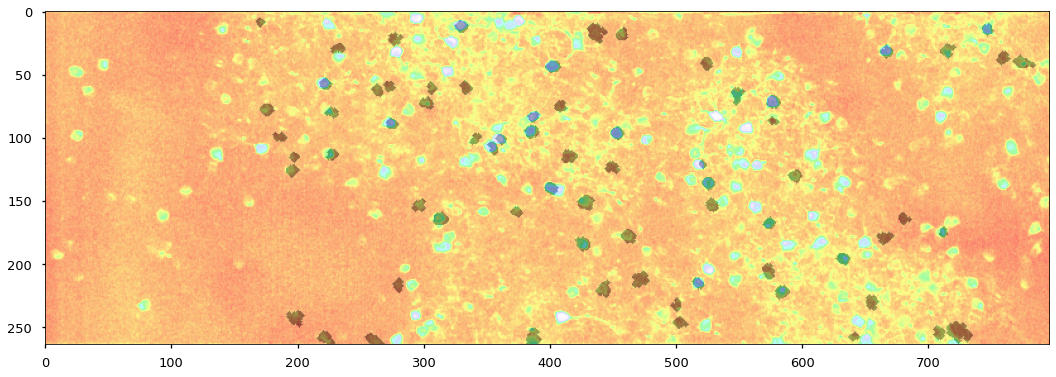

In [90]:
# compare caiman max correlation img vs manual segmentation (strict, but wrong time window)
corr_caiman = Cn.T

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# get colormap
ncolors = 256
color_array = plt.get_cmap('gist_rainbow')(range(ncolors))
# change alpha values
color_array[:,-1] = np.linspace(1.0,0.0,ncolors)
# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='rainbow_alpha',colors=color_array)
# register this new colormap with matplotlib
plt.register_cmap(cmap=map_object)

im1 = plt.imshow(corr_caiman, cmap='rainbow_alpha', alpha=1)
im2 = plt.imshow(seg_ref, cmap='Blues', alpha=0.4)
plt.show()

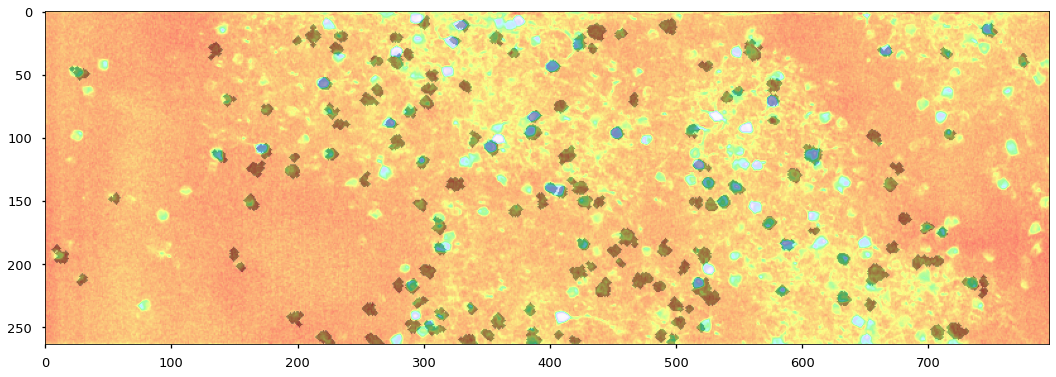

In [81]:
# use manual segmentation (blind, less strict)
corr_caiman = Cn.T
im1 = plt.imshow(corr_caiman, cmap='rainbow_alpha', alpha=1)
im2 = plt.imshow(seg_ref, cmap='Blues', alpha=0.4)
plt.show()

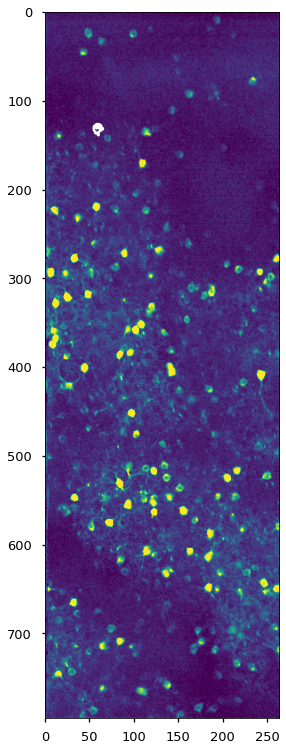

In [301]:
crd = plot_contours(cnm.estimates.A[:, 195], Cn, thr=0.9, display_numbers=False)

In [73]:
def caiman_reasoning(idx_list, is_cell, sort_by):

    import pylab as pl
    from caiman.base.rois import com
    from caiman.utils.visualization import plot_contours, get_contours
    from post_analysis import check_eval_results_LL

    for component_id in idx_list:
        snr, rval, cnn = check_eval_results_LL(cnm, [component_id], print_score=False)
#         if (rval >= r_max) and (snr < snr_max) and (cnn < cnn_max):

        crd = plot_contours(cnm.estimates.A[:, component_id], Cn, thr=0.9, display_numbers=False);
        plt.clf()
        plt.figure()

        ypos = np.floor(crd[0]['CoM']).astype(int)[0] # y position of caiman segmented cell's center of mass
        proximity_range = 50 # plot how many pixels around CoM
        Cn_chunk = Cn[max(ypos-proximity_range, 0):min(ypos+proximity_range, Cn.shape[0]), :] # do not exceed Cn nrow
        plt.imshow(Cn_chunk)

        crd_converted = crd[0]['coordinates'].copy()
        crd_converted[:,1] = crd_converted[:,1] - max(ypos-proximity_range, 0) # origin (0 position) shifting due to edge
        pl.plot(*crd_converted.T, color='red', alpha=1)

        snr_min = cnm.params.quality['SNR_lowest']
        snr_max = cnm.params.quality['min_SNR']
        r_min = cnm.params.quality['rval_lowest']
        r_max = cnm.params.quality['rval_thr']
        cnn_min = cnm.params.quality['cnn_lowest']
        cnn_max = cnm.params.quality['min_cnn_thr']

        color_snr = 'black'
        if snr < snr_min: color_snr = 'red';
        elif snr >= snr_max: color_snr = 'green';
        color_rval = 'black'
        if rval < r_min: color_rval = 'red';
        elif rval >= r_max: color_rval = 'green';
        color_cnn = 'black'
        if cnn < cnn_min: color_cnn = 'red';
        elif cnn >= cnn_max: color_cnn = 'green';

        txt_snr = 'snr = ' + ('%.2f' % snr) + " @ threshold (" + ('%.2f' % snr_min) + ", " + ('%.2f' % snr_max) + ")"
        txt_rval = 'rval = ' + ('%.2f' % rval) + " @ threshold (" + ('%.2f' % r_min) + ", " + ('%.2f' % r_max) + ")"
        txt_cnn = 'cnn = ' + ('%.2f' % cnn) + " @ threshold (" + ('%.2f' % cnn_min) + ", " + ('%.2f' % cnn_max) + ")"

        txt_ypos = 0.2
        plt.text(0.4, txt_ypos, txt_snr, fontsize=14, color=color_snr, transform=plt.gcf().transFigure)
        plt.text(0.4, txt_ypos-0.02, txt_rval, fontsize=14, color=color_rval, transform=plt.gcf().transFigure)
        plt.text(0.4, txt_ypos-0.04, txt_cnn, fontsize=14, color=color_cnn, transform=plt.gcf().transFigure);

        if is_cell == True:
            cell_string = '_cell_'
        else:
            cell_string = '_noncell_'
        
        if sort_by == 'snr':
            score_string = 'snr_score_' + str(np.floor(snr*100))
        elif sort_by == 'rval':
            score_string = 'rval_score_' + str(np.floor(rval*100))
        elif sort_by == 'cnn':
            score_string = 'cnn_score_' + str(np.floor(cnn*100))
        else:
            score_string = ''
        
        filename = score_string + cell_string + str(component_id)
        plt.savefig(filename +'.png', bbox_inches='tight')
        plt.close()

In [ ]:
caiman_reasoning(cnm.estimates.idx_components, is_cell=True, sort_by=None)
caiman_reasoning(cnm.estimates.idx_components_bad, is_cell=False, sort_by=None)

# Extract activity

(1065, 100000)


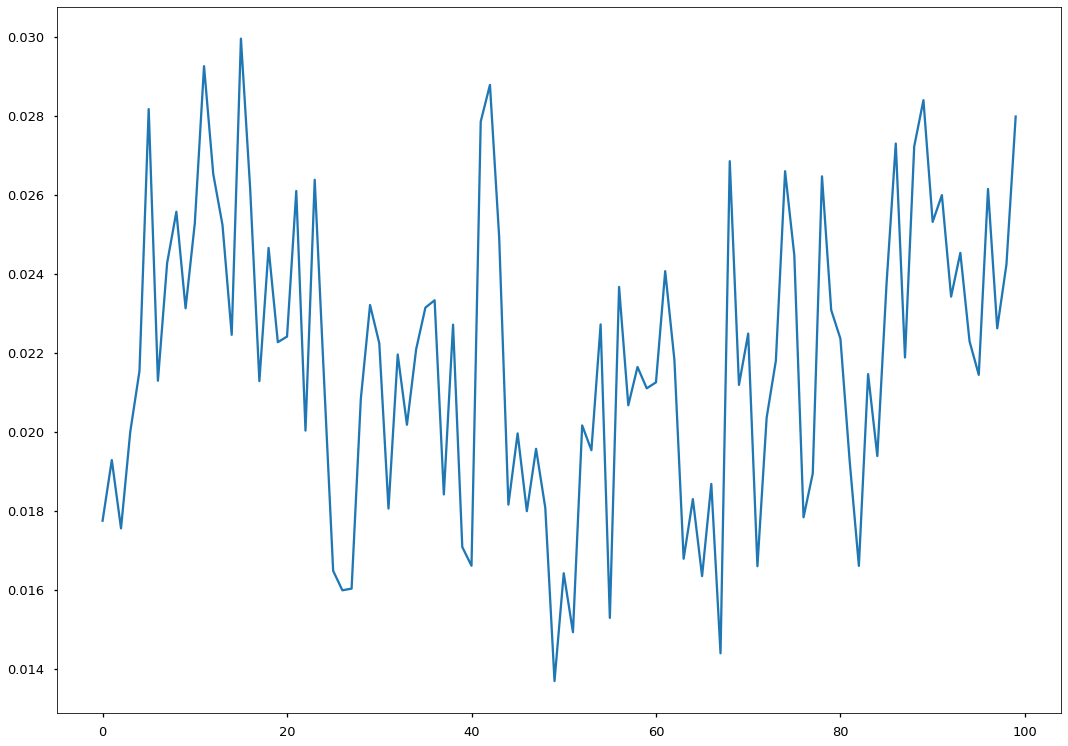

In [80]:
print(cnm.estimates.F_dff.shape)
df_cells = cnm.estimates.F_dff[cnm.estimates.idx_components, :]
df_avg = np.mean(df_cells, axis=0)
df_avg.shape
# df_0 = df_all[0,:]
plt.plot(df_avg[100:200])